In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
#end of converting pickle dataset

import random
from sklearn.model_selection import train_test_split

#classification using SVC
from sklearn.svm import SVC

# Dataset directory define for converting into pickle dataset

In [2]:
dir = "catDog"
categories=['cat','dog']
data = []

# Image dataset convert into pickle data file

In [3]:
for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        pet_img = cv2.imread(imgpath,0)
        try:
            pet_img =cv2.resize(pet_img,(50,50))
            image= np.array(pet_img).flatten()
            data.append([image,label])
            #cv2.imshow('image',pet_img)
        except Exception as e:
            pass

# print(len(data))
pick_in=open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Pickle data collection

In [4]:
pick_in = open('data1.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

# Data prepared

In [5]:
random.shuffle(data)
features = []
labels = []

In [6]:
for feature, label in data:
    features.append(feature)
    labels.append(label)

# Split the dataset

In [7]:
xtrain, xtest, ytrain, ytest= train_test_split(features, labels, test_size= 0.25)

# SVM classification model build up

Accuracy:  0.5214723926380368
Prediction is:  cat


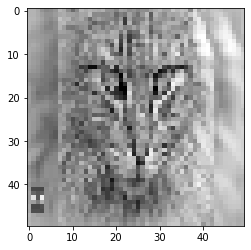

In [13]:
model = SVC(C=1, kernel='poly',gamma='auto')
model.fit(xtrain,ytrain)

pick = open('medel.sav','wb')    #pickle file save as "medel.sav" based on webserver 
pickle.dump(model,pick)
pick.close()

prediction = model.predict(xtest)
accuracy = model.score(xtest,ytest)

categories=['cat','dog']
print("Accuracy: ",accuracy)
print("Prediction is: ",categories[prediction[0]])

mypet = xtest[30].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()

Accuracy:  0.9079754601226994
Prediction is:  cat


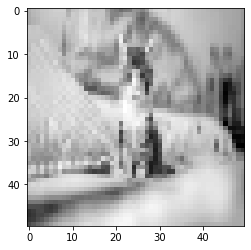

In [10]:
xtrain, xtest, ytrain, ytest= train_test_split(features, labels, test_size= 0.50)
pick = open('medel.sav','rb')      #Read the "medel.sav" file
model=pickle.load(pick)
pick.close()

prediction = model.predict(xtest)
accuracy = model.score(xtest,ytest)

categories=['cat','dog']
print("Accuracy: ",accuracy)
print("Prediction is: ",categories[prediction[0]])

mypet = xtest[0].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()